In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
df1 = pd.read_csv('minutes_watched_2021_paid_0.csv')
df2 = pd.read_csv('minutes_watched_2021_paid_1.csv')
df3 = pd.read_csv('minutes_watched_2022_paid_0.csv')
df4 = pd.read_csv('minutes_watched_2022_paid_1.csv')

In [49]:
# distinary of datasets and names
dfs = {
    '2021_not_paid': df1,
    '2021_paid': df2,
    '2022_not_paid': df3,
    '2022_paid': df4
}

In [50]:
# examine the datasets
for name, df in dfs.items():
    print(f'\n{name}')
    display(df.head())
    display(df.info())


2021_not_paid


,student_id,minutes_watched,paid_in_q2
0,1067,0.27,0
1,1571,77.60,0
2,2058,0.42,0
3,2495,0.18,0
4,2622,15.87,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       5334 non-null   int64  
 1   minutes_watched  5334 non-null   float64
 2   paid_in_q2       5334 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 125.1 KB


None


2021_paid


,student_id,minutes_watched,paid_in_q2
0,603,8.18,1
1,616,1103.45,1
2,709,2.30,1
3,778,201.60,1
4,782,33.92,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       2305 non-null   int64  
 1   minutes_watched  2305 non-null   float64
 2   paid_in_q2       2305 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 54.1 KB


None


2022_not_paid


,student_id,minutes_watched,paid_in_q2
0,389,0.15,0
1,1424,0.07,0
2,1437,47.10,0
3,1845,9.45,0
4,1866,0.08,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       6055 non-null   int64  
 1   minutes_watched  6055 non-null   float64
 2   paid_in_q2       6055 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 142.0 KB


None


2022_paid


,student_id,minutes_watched,paid_in_q2
0,616,116.02,1
1,838,348.28,1
2,841,324.75,1
3,862,166.73,1
4,969,584.60,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       2786 non-null   int64  
 1   minutes_watched  2786 non-null   float64
 2   paid_in_q2       2786 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 65.4 KB


None

Text(0.5, 1.0, 'Paid Students for Q2 2022')

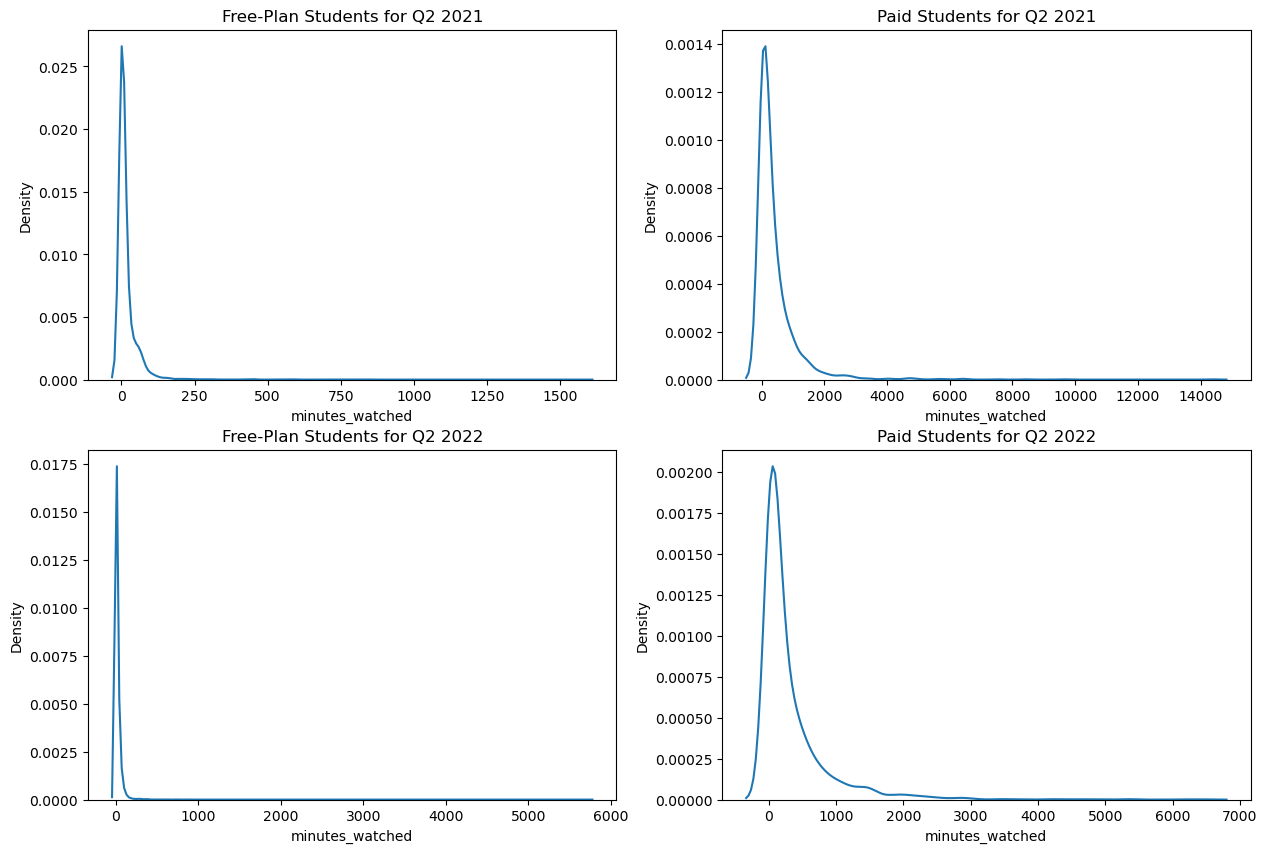

In [22]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.kdeplot(data=df1['minutes_watched'], ax=axes[0,0]).set_title('Free-Plan Students for Q2 2021')
sns.kdeplot(data=df2['minutes_watched'], ax=axes[0,1]).set_title('Paid Students for Q2 2021')
sns.kdeplot(data=df3['minutes_watched'], ax=axes[1,0]).set_title('Free-Plan Students for Q2 2022')
sns.kdeplot(data=df4['minutes_watched'], ax=axes[1,1]).set_title('Paid Students for Q2 2022')

In [43]:
# remove outliers, only keeping the data below the 99 percentitle
# define the percentile we are using as a threshold
percentile1 = df1['minutes_watched'].quantile(0.99)
df1_no_outliers = df1[df1['minutes_watched']<percentile1]

percentile2 = df2['minutes_watched'].quantile(0.99)
df2_no_outliers = df2[df2['minutes_watched']<percentile2]

percentile3 = df3['minutes_watched'].quantile(0.99)
df3_no_outliers = df3[df3['minutes_watched']<percentile3]

percentile4 = df4['minutes_watched'].quantile(0.99)
df4_no_outliers = df4[df4['minutes_watched']<percentile4]

Text(0.5, 1.0, 'Paid Students for Q2 2022')

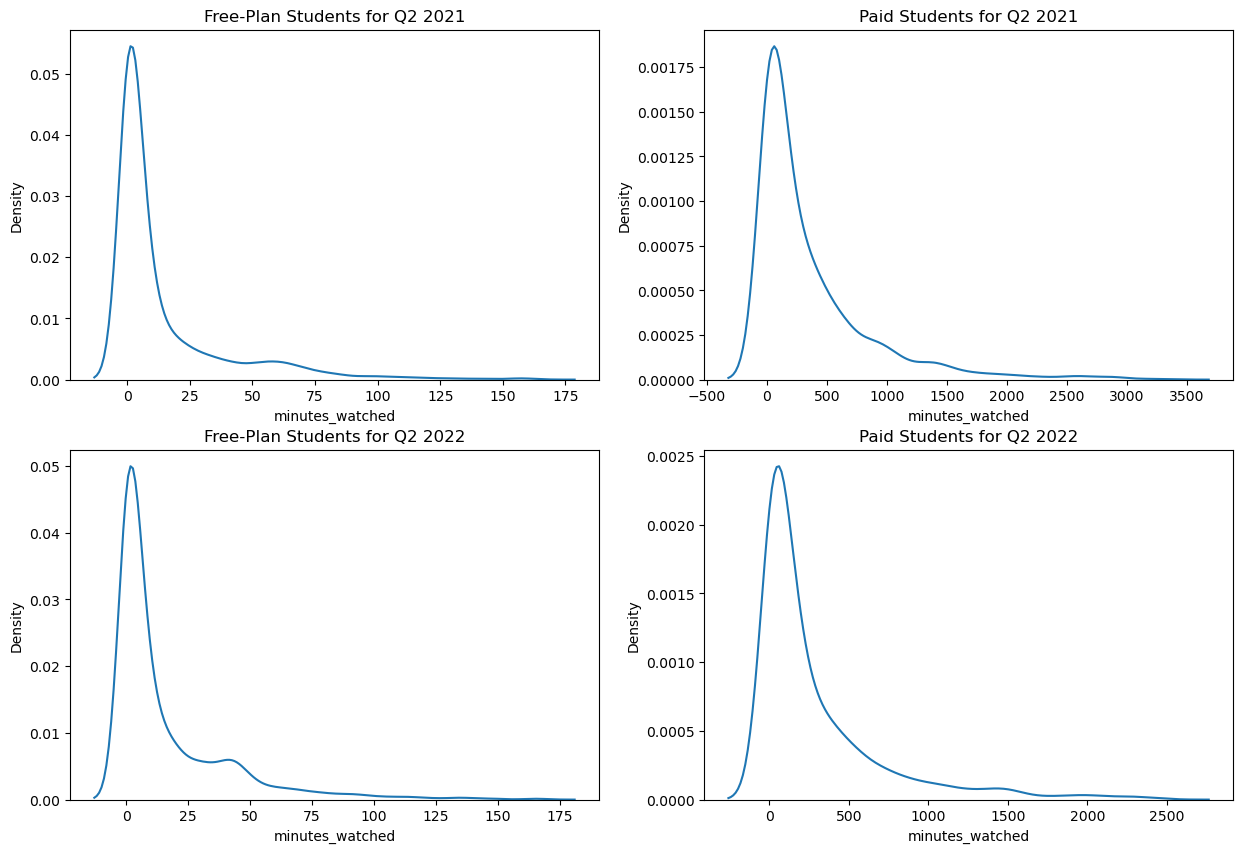

In [45]:
# check results
fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.kdeplot(data=df1_no_outliers['minutes_watched'], ax=axes[0,0]).set_title('Free-Plan Students for Q2 2021')
sns.kdeplot(data=df2_no_outliers['minutes_watched'], ax=axes[0,1]).set_title('Paid Students for Q2 2021')
sns.kdeplot(data=df3_no_outliers['minutes_watched'], ax=axes[1,0]).set_title('Free-Plan Students for Q2 2022')
sns.kdeplot(data=df4_no_outliers['minutes_watched'], ax=axes[1,1]).set_title('Paid Students for Q2 2022')

In [47]:
# export datasets without outliers
df1_no_outliers.to_csv('minutes_watched_2021_paid_0_no_outliers.csv',index=False)
df2_no_outliers.to_csv('minutes_watched_2021_paid_1_no_outliers.csv',index=False)
df3_no_outliers.to_csv('minutes_watched_2022_paid_0_no_outliers.csv',index=False)
df4_no_outliers.to_csv('minutes_watched_2022_paid_1_no_outliers.csv',index=False)